**ImportnPakages**
 * numpy is the fundamental package for scientific computing with Python.
 
 * matplotlib is a library to plot graphs in Python.
 
 * h5py is a common package to interact with a dataset that is stored on an H5 file.
 
 * PIL and scipy are used here to test your model with your own picture at the end.
 
 * dnn_app_utils provides the functions implemented in the "Building your Deep Neural Network: Step by Step" assignment to this notebook.
 * np.random.seed(1) is used to keep all the random function calls consistent. It will help us grade your work.

In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v3 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

In [2]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

In [3]:
print(classes)

[b'non-cat' b'cat']


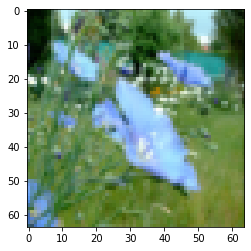

In [4]:
index = 20
plt.imshow(train_x_orig[index])

In [5]:
train_x_orig.shape

(209, 64, 64, 3)

In [6]:
# Explore your dataset
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [7]:
# Reshape the training and test examples
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
# train_x_flatten.shape
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# normalize between 0, 1
train_x = train_x_flatten/255
test_x = test_x_flatten/255



**General methodology**

As usual you will follow the Deep Learning methodology to build the model:

1. Initialize parameters / Define hyperparameters
2. Loop for num_iterations:

    a. Forward propagation
    
    b. Compute cost function
    
    c. Backward propagation
    
    d. Update parameters (using parameters, and grads from backprop) 
    
4. Use trained parameters to predict labels

**2-Layer Model**
* The input is a (64,64,3) image which is flattened to a vector of size (12288,1).

* The corresponding vector: [x0,x1,...,x12287]T is then multiplied by the weight matrix W[1] of size (n[1],12288).

* You then add a bias term and take its relu to get the following vector: [a[1]0,a[1]1,...,a[1]n[1]−1]T.

* You then repeat the same process.

* You multiply the resulting vector by W[2] and add your intercept (bias).

* Finally, you take the sigmoid of the result. If it is greater than 0.5, you classify it to be a cat.

**L-Layer Model**

* The input is a (64,64,3) image which is flattened to a vector of size (12288,1).

* The corresponding vector: [x0,x1,...,x12287]T is then multiplied by the weight matrix W[1] and then you add the intercept b[1]. The result is called the linear unit.

* Next, you take the relu of the linear unit. This process could be repeated several times for each (W[l],b[l]) depending on the model architecture.

* Finally, you take the sigmoid of the final linear unit. If it is greater than 0.5, you classify it to be a cat.

n_x = 12288
n_h = 7
n_y = 1
layers_dims =(n_x, n_h, n_y)

In [9]:
def two_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False):
    np.random.seed(1)
    grads = {}
    costs = []
    m = X.shape[1]
    (n_x, n_h, n_y) = layers_dims
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    for i in range(0, num_iterations):
        A1, cache1 = linear_activation_forward(X, W1, b1, activation='relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation='sigmoid')
        
        cost = compute_cost(A2, Y)
        
        # Initializing backward propagation
        dA2 = -(np.divide(Y, A2) - np.divide(1-Y, 1 - A2))
        
        # Backward propagation
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation='sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation='relu')
        
        grads['dW2'] = dW2
        grads['db2'] = db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        if print_cost and i%100 == 0:
            print('Cost after iteration {}: {}'.format(i, np.squeeze(cost)))
        if print_cost and i%100 == 0:
            costs.append(cost)
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.693049735659989
Cost after iteration 100: 0.6464320953428849
Cost after iteration 200: 0.6325140647912678
Cost after iteration 300: 0.6015024920354665
Cost after iteration 400: 0.5601966311605748
Cost after iteration 500: 0.5158304772764731
Cost after iteration 600: 0.4754901313943325
Cost after iteration 700: 0.43391631512257495
Cost after iteration 800: 0.40079775362038844
Cost after iteration 900: 0.3580705011323798
Cost after iteration 1000: 0.3394281538366413
Cost after iteration 1100: 0.3052753636196265
Cost after iteration 1200: 0.27491377282130147
Cost after iteration 1300: 0.24681768210614843
Cost after iteration 1400: 0.19850735037466105
Cost after iteration 1500: 0.1744831811255662
Cost after iteration 1600: 0.17080762978096453
Cost after iteration 1700: 0.11306524562164727
Cost after iteration 1800: 0.0962942684593716
Cost after iteration 1900: 0.08342617959726872
Cost after iteration 2000: 0.07439078704319087
Cost after iteration 2100: 0.066307481

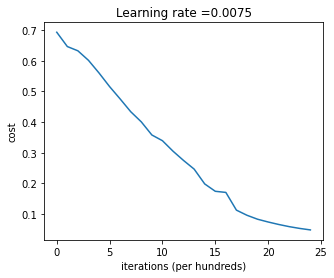

In [10]:
# parameters = two_layer_model(train_x, train_y, layers_dims=(n_x, n_h, n_y), num_iterations=2500, print_cost=True)

In [11]:
prediction_train = predict(train_x, train_y, parameters)

Accuracy: 0.9999999999999998


In [12]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.72


**L-Layer Model**

In [27]:
layers_dims = [12288, 20, 7, 5, 1]

In [31]:
def L_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=1, print_cost=True):
    
#   layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).

    
    np.random.seed(1)
    costs = []
    parameters = initialize_parameters_deep(layers_dims)
    
    for i in range(0, num_iterations):
        AL, caches = L_model_forward(X, parameters)
        cost = compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)
                # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    plt.plot(np.squeeze(costs))
    plt.ylabel('Cost')
    plt.xlabel('iteration')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [30]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)


In [32]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9999999999999998


In [33]:
pred_test = predict(test_x, test_y, parameters)


Accuracy: 0.72


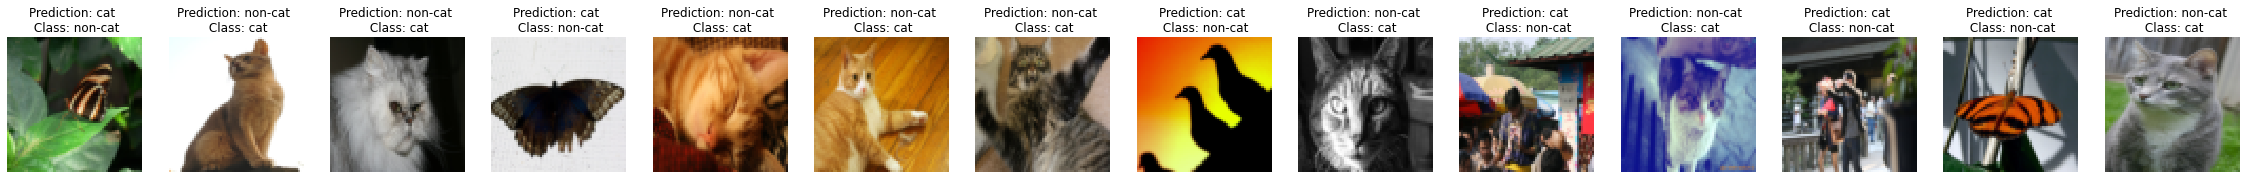

In [34]:
print_mislabeled_images(classes, test_x, test_y, pred_test)
